<h1><center>Finding Potential Real Estate Market </center></h1>                            

<h2><center>Using Data Analysis </center></h2>  

## Introduction:

  It is always crucial for a real estate developer to find a potential property worthy investing, this notebook/report is to analyze how location data such as demographics, crime data, school ratings and venue data influence high end real estate market, then apply the same principles to find undervalued areas, where the price is not too high, but shows similar pattern in high end neighborhoods.

## Methodology:
####A.Getting all the Data.
####B. Data Preprocessing.
####C. Venue Data.
####D. Cluster Neighborhoods.
####E. Conclusion.

Import necessary libraries.

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import re

## A.Getting all the Data:

  The data will be limited to the residential properties in Los Angeles County California which includes 88 cities and 370 zip codes. 

### 1. All zip codes with latitude and longitude in County of Los Angeles 

In [ ]:
# the data is downloaded from County of Los Angeles Open data
path="https://data.lacounty.gov/api/views/c3xr-3jw2/rows.csv?accessType=DOWNLOAD&bom=true&query=select+*"
df=pd.read_csv(path)

In [ ]:
len(df)

370

In [ ]:
# sort the data by zip codes, then set the zip codes as index
df.sort_values(["ZIP Code"],inplace=True,ascending=True)
df1=df.set_index("ZIP Code")
df1.head()

Postal City 1  ... Zip Codes
ZIP Code                ...          
90001      Los Angeles  ...   22350.0
90002      Los Angeles  ...   22351.0
90003      Los Angeles  ...   22352.0
90004      Los Angeles  ...   22721.0
90005      Los Angeles  ...   22722.0

[5 rows x 11 columns]

In [ ]:
# Drop columns except ZIP Code, Postal City 1, and Location, rename Postal City 1 to Postal City, expand Location to 2 columns Latitude and Longitude 
## Please note Postal city is not an actual city but a community, it's kind of like borough. Such as "West Hollywood" is not a city, it's part of the city of Los Angeles.
df2=df1.drop(["Postal City 2","Postal City 3", "Not Acceptable 1","Not Acceptable 2","Not Acceptable 3"],axis=1)
df2.head()

Postal City 1  ... Zip Codes
ZIP Code                ...          
90001      Los Angeles  ...   22350.0
90002      Los Angeles  ...   22351.0
90003      Los Angeles  ...   22352.0
90004      Los Angeles  ...   22721.0
90005      Los Angeles  ...   22722.0

[5 rows x 6 columns]

In [ ]:
df3=df2.drop(df2.columns[2:],axis=1)
df3.head()

Postal City 1                                        Location
ZIP Code                                                              
90001      Los Angeles  90001(33.973274047000075, -118.24896959899996)
90002      Los Angeles   90002(33.94895070600006, -118.24697958699994)
90003      Los Angeles  90003(33.963350054000045, -118.27393600099998)
90004      Los Angeles  90004(34.075720587000035, -118.30301712299996)
90005      Los Angeles   90005(34.05907052600003, -118.30301712299996)

In [ ]:
# function to break the Location data to Latitude and Logitude separately
def LatLon(Location):
    x=re.split(r'[(,)]',Location)[1]
    y=re.split(r'[(,)]',Location)[2]
    return(x,y)

In [ ]:
# iterate through all rows to get latitude and longitude from Location data and create 2 new columns  
coordinates=[]
for idx in df3.index:
    coordinates.append(LatLon(df3.loc[idx,'Location']))
df3[['Latitude','Longitude']]=coordinates

In [ ]:
df3.head()

Postal City 1  ...             Longitude
ZIP Code                ...                      
90001      Los Angeles  ...   -118.24896959899996
90002      Los Angeles  ...   -118.24697958699994
90003      Los Angeles  ...   -118.27393600099998
90004      Los Angeles  ...   -118.30301712299996
90005      Los Angeles  ...   -118.30301712299996

[5 rows x 4 columns]

In [ ]:
#drop Location column
df4=df3.drop(["Location"],axis=1)
#rename column Postal City 1 to Postal City
df4.rename(columns={"Postal City 1" : "Postal City"},inplace=True)

In [ ]:
#pd.set_option("max_rows",500)
#df4

In [ ]:
type(df4.loc[90003][2])

str

In [ ]:
#convert str to float
df4['Latitude']=df4['Latitude'].astype(float)
df4['Longitude']=df4['Longitude'].astype(float)
#df["A"] = pd.to_numeric(df["A"], downcast="float")

In [ ]:
type(df4.loc[90003][2])

numpy.float64

In [ ]:
len(df4)

370

### 2. Housing Prices from Zillow Reseach.

Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.CSV is the Zillow Home Value Index (ZHVI) for single family houses time series. The file is downloaded from https://www.zillow.com/research/data/  by zip codes. ZHVI reflects the typical value for homes in the 33th to 67th percentile range. The data with all homes(sigle family houses,condos,apartments) could be used, but the prices for single family houses would be more accurate to reflect the value of the real estate in that region.

In [ ]:
# the data is downloaded from https://www.zillow.com/research/data/ by zip codes,single family houses
path="https://files.zillowstatic.com/research/public_csvs/zhvi/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1630664986"
df_zillow=pd.read_csv(path)

In [ ]:
df_z=df_zillow.copy(deep=True)

In [ ]:
df_z.head()

RegionID  SizeRank  RegionName  ... 2021-06-30 2021-07-31 2021-08-31
0     61639         0       10025  ...  1563240.0  1606597.0  1639180.0
1     84654         1       60657  ...   723258.0   727168.0   732896.0
2     61637         2       10023  ...  2533710.0  2566952.0  2598620.0
3     91982         3       77494  ...   391327.0   402126.0   413158.0
4     84616         4       60614  ...   961652.0   965197.0   971941.0

[5 rows x 269 columns]

In [ ]:
len(df_z)

30489

In [ ]:
#rename column RegionID to ZIP Code
df_z.rename(columns={"RegionID" : "ZIP Code"},inplace=True)
#drop irrelevant columns
df_z.drop(['SizeRank','RegionName','RegionType','StateName','State','City','Metro','CountyName'],axis=1,inplace=True)
#set ZIP code as index
df_z.set_index("ZIP Code",inplace=True)

In [ ]:
df5=pd.merge(df4,df_z,on='ZIP Code',how='inner')


In [ ]:
#pd.set_option('max_columns',None)
df5.head()

Postal City   Latitude  ...  2021-07-31  2021-08-31
ZIP Code                          ...                        
90007     Los Angeles  34.028334  ...    111497.0    111492.0
90011     Los Angeles  34.007904  ...    147514.0    147717.0
90012     Los Angeles  34.059483  ...    161902.0    164859.0
90013     Los Angeles  34.046022  ...    102011.0    102711.0
90014     Los Angeles  34.044754  ...    150505.0    152269.0

[5 rows x 263 columns]

In [ ]:
df5.shape

(267, 263)

105 zip codes are dropped, either because it's just a P.O. box or doesn't have data.

In [ ]:
# A forecast model such as AutoRegession(AR) model could be used to predict the furture data based on the time series data. For simplility sake, only the data of the last month is used.
df5.drop(df5.columns[3:-1],axis=1,inplace=True)
df5=df5.rename(columns={'2021-08-31':'PriceIndex'})
df5.head()

Postal City   Latitude   Longitude  PriceIndex
ZIP Code                                                
90007     Los Angeles  34.028334 -118.285077    111492.0
90011     Los Angeles  34.007904 -118.259037    147717.0
90012     Los Angeles  34.059483 -118.242048    164859.0
90013     Los Angeles  34.046022 -118.246250    102711.0
90014     Los Angeles  34.044754 -118.252737    152269.0

### 3. Demographics Data.

  Demographics data is scraped from ZipWho.com, using Beautiful Soup and Request by zip codes. Mainly concentrated on median income, cost of living index, college degree, median age and ethnicity.

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
#extract data for zip code 91011
#load URL 
URL='https://zipwho.com/?zip={}&city=&filters=--_--_--_--&state=&mode=zip'.format(91011)
page=requests.get(URL)
page

<Response [200]>

In [ ]:
soup=bs(page.content,'html.parser')

In [ ]:
#extract data for script
script = soup.find('script')
string1=script.string[640:797]
print(string1)

91011,La Canada Flintridge,CA,109802,99,644.7,99,25.3,91,89.9,94,6.8,95,63.6,98,66.3,99,20317,75,2.9,86,42.2,90,89.1,33,69.8,93,5.6,6,71.2,25,0.5,34,19.1,98,


In [ ]:
# split string to get data in string format
script_data=[]
script_data_temp=[]
#script_data=[ x for x in script if type(x)==float ]
script_data_temp=string1.split('"')
script_data=script_data_temp[0].split(",")
print(script_data)


['91011', 'La Canada Flintridge', 'CA', '109802', '99', '644.7', '99', '25.3', '91', '89.9', '94', '6.8', '95', '63.6', '98', '66.3', '99', '20317', '75', '2.9', '86', '42.2', '90', '89.1', '33', '69.8', '93', '5.6', '6', '71.2', '25', '0.5', '34', '19.1', '98', '']


In [ ]:
len(script_data[31])

3

In [ ]:
#function to convert string to float
def string_to_float(x):
  if len(x)==0:
    y=0
  else:
    y=float(x)
  return y

In [ ]:
script_data[35]

''

In [ ]:
#get data on 7 indexes: MedianIncome,CostOfLivingIndex,CollegeDegreePercent,WhitePercent,BlackPercent,AsianPercent,HispanicEthnicityPercent
MedianIncome=string_to_float(script_data[3])
CostOfLivingIndex=string_to_float(script_data[5])
CollegeDegreePercent=string_to_float(script_data[13])
WhitePercent=string_to_float(script_data[29])
BlackPercent=string_to_float(script_data[31])
AsianPercent=string_to_float(script_data[33])
HispanicEthnicityPercent=string_to_float(script_data[35])
print(MedianIncome,CostOfLivingIndex,CollegeDegreePercent,WhitePercent,BlackPercent,AsianPercent,HispanicEthnicityPercent)

109802.0 644.7 63.6 71.2 0.5 19.1 0


In [ ]:
#extract demographic data for any zip code
def get_demo(zip):
  url = 'https://zipwho.com/?zip={}&city=&filters=--_--_--_--&state=&mode=zip'.format(zip)
  page=requests.get(url)
  soup=bs(page.content,'html.parser')
  script = soup.find('script')
  string1=script.string[640:797]
  if string1[7]=='f': # if no data for the zip code, exit the function
    return[float("nan"),float("nan"),float("nan"),float("nan"),float("nan"),float("nan"),float("nan")]
    exit()
  else:
    script_data=[]
    script_data_temp=[]
    #script_data=[ x for x in script if type(x)==float ]
    script_data_temp=string1.split('"')    # strings are in different length, 91006 vs 90210, need to split twice
    script_data=script_data_temp[0].split(",")
    MedianIncome=string_to_float(script_data[3])
    CostOfLivingIndex=string_to_float(script_data[5])
    CollegeDegreePercent=string_to_float(script_data[13])
    WhitePercent=string_to_float(script_data[29])
    BlackPercent=string_to_float(script_data[31])
    AsianPercent=string_to_float(script_data[33])
    HispanicEthnicityPercent=string_to_float(script_data[35])
    return[MedianIncome,CostOfLivingIndex,CollegeDegreePercent,WhitePercent,BlackPercent,AsianPercent,HispanicEthnicityPercent]

In [ ]:
get_demo(90071)

[nan, nan, nan, nan, nan, nan, nan]

In [ ]:
#add 7 imdexes to the dataframe
df5[['MedianIncome','CostOfLivingIndex','CollegeDegreePercent','WhitePercent','BlackPercent','AsianPercent','HispanicPercent']]=''
df5.head()

Postal City   Latitude  ...  AsianPercent  HispanicPercent
ZIP Code                          ...                               
90007     Los Angeles  34.028334  ...                               
90011     Los Angeles  34.007904  ...                               
90012     Los Angeles  34.059483  ...                               
90013     Los Angeles  34.046022  ...                               
90014     Los Angeles  34.044754  ...                               

[5 rows x 11 columns]

In [ ]:
#get 7 indexes in every zipcode 
for zip in df5.index:
  result=get_demo(zip)
  df5.loc[zip,'MedianIncome']=result[0]
  df5.loc[zip,'CostOfLivingIndex']=result[1]
  df5.loc[zip,'CollegeDegreePercent']=result[2]
  df5.loc[zip,'WhitePercent']=result[3]
  df5.loc[zip,'BlackPercent']=result[4]
  df5.loc[zip,'AsianPercent']=result[5]
  df5.loc[zip,'HispanicPercent']=result[6]

In [ ]:
df5.head(300)

Postal City   Latitude  ...  AsianPercent  HispanicPercent
ZIP Code                          ...                               
90007     Los Angeles  34.028334  ...          10.4             57.9
90011     Los Angeles  34.007904  ...           0.3             85.6
90012     Los Angeles  34.059483  ...          38.6             30.2
90013     Los Angeles  34.046022  ...          13.1               23
90014     Los Angeles  34.044754  ...          29.2             27.2
...               ...        ...  ...           ...              ...
93552        Palmdale  34.562822  ...           3.9             43.1
93553     Pearblossom  34.470473  ...             0             10.1
93560        Rosamond  34.860172  ...           2.8             25.4
93563        Valyermo  34.416152  ...           NaN              NaN
93586       Lancaster  34.687571  ...           NaN              NaN

[267 rows x 11 columns]

In [ ]:
#drop zip codes contain incomplete data
df6=df5.dropna()

In [ ]:
df6.head()

Postal City   Latitude  ...  AsianPercent  HispanicPercent
ZIP Code                          ...                               
90007     Los Angeles  34.028334  ...          10.4             57.9
90011     Los Angeles  34.007904  ...           0.3             85.6
90012     Los Angeles  34.059483  ...          38.6             30.2
90013     Los Angeles  34.046022  ...          13.1               23
90014     Los Angeles  34.044754  ...          29.2             27.2

[5 rows x 11 columns]

In [ ]:
print(df5.shape,df6.shape) # 51 zip codes dropped

(267, 11) (217, 11)


### 4. Crime Data.

Crime data is scraped from bestplaces.net, using Beautiful Soup and Request by zip codes. Crime is ranked on a scale of 1(low crime) to 100(high) crime. There are 2 types crimes, violent crime and property crime. Since they are corelated and roughly proportional, only Violent Crime is used for simplity purpose.

In [ ]:
#extract crime rate for zip code 90007,then use function to extract rate from all zip codes
#load URL 
zip=90007
city=df6.loc[zip,"Postal City"]
print(zip,city)

90007 Los Angeles


In [ ]:
#generate an URL from a specific zip code
URL1='https://www.bestplaces.net/crime/zip-code/california/{}/{}'.format(city,zip)
URL1

'https://www.bestplaces.net/crime/zip-code/california/Los Angeles/90007'

In [ ]:
page1=requests.get(URL1,verify=False)
page1

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Response [200]>

In [ ]:
soup1=bs(page1.content,'html.parser')

In [ ]:
print(soup1.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<html xmlns="//www.w3.org/1999/xhtml">
<head>
<script async="" data-ad-client="ca-pub-8348531667164181" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
<!-- Google Tag Manager -->
<script>(function (w, d, s, l, i) {
w[l] = w[l] || []; w[l].push({
'gtm.start':
new Date().getTime(), event: 'gtm.js'
}); var f = d.getElementsByTagName(s)[0],
j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : ''; j.async = true; j.src =
'//www.googletagmanager.com/gtm.js?id=' + i + dl; f.parentNode.insertBefore(j, f);
})(window, document, 'script', 'dataLayer', 'GTM-56ZQ3X');</script>
<!-- End Google Tag Manager -->
<meta content="https://www.bestplaces.net" name="og:site_name"/><title>
	Zip 90007 (Los Angeles, CA) Crime
</title><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="Best Places to Live | Compare cost of living, crime, cities, schools and more. " name="description"/><meta conte

In [ ]:
#find the script containing the crime rate
Crime_text1=soup1.find_all(class_='col-md-12')[1]
Crime_text1

<div class="col-md-12">
<p>Crime is ranked on a scale of 1 (low crime) to 100 (high crime)</p><h5>Los Angeles (zip 90007) violent crime is 51.1.<small>  (The US average is 22.7)</small></h5><h5>Los Angeles (zip 90007) property crime is 55.1.<small>  (The US average is 35.4)</small></h5><hr/><br/><b>NOTE:</b> The city of Los Angeles, California  does not have FBI Crime Statistics.  The closest similar sized city with FBI crime data is the city of Maywood, California. The charts below are detailed crime statistics for the city of Maywood, California.  Click links below to see charts for each crime category.
                                    
                                </div>

In [ ]:
Crime_text2=Crime_text1.get_text()
Crime_text2

'\nCrime is ranked on a scale of 1 (low crime) to 100 (high crime)Los Angeles (zip 90007) violent crime is 51.1.  (The US average is 22.7)Los Angeles (zip 90007) property crime is 55.1.  (The US average is 35.4)NOTE: The city of Los Angeles, California  does not have FBI Crime Statistics.  The closest similar sized city with FBI crime data is the city of Maywood, California. The charts below are detailed crime statistics for the city of Maywood, California.  Click links below to see charts for each crime category.\r\n                                    \r\n                                '

In [ ]:
# get the crime rate after words"violent crime is"
Crime_text3=Crime_text2.split("violent crime is",1)[1]
Crime_text4=Crime_text3.split()[0]
#strip the "."
Crime_rate=float(Crime_text4[0:-1])
Crime_rate

51.1

In [ ]:
#function to get the crime rate for any zip in California
def get_Crime_rate(zip):
  city=df6.loc[zip,"Postal City"]
  URL1='https://www.bestplaces.net/crime/zip-code/california/{}/{}'.format(city,zip)
  page1=requests.get(URL1,verify=False)
  soup1=bs(page1.content,'html.parser')
  soup1.prettify
  Crime_text1=soup1.find_all(class_='col-md-12')[1]
  Crime_text2=Crime_text1.get_text()
  Crime_text3=Crime_text2.split("violent crime is",1)[1]
  Crime_text4=Crime_text3.split()[0]
  Crime_rate=float(Crime_text4[0:-1])
  return float(Crime_rate)

In [ ]:
get_Crime_rate(90007)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


51.1

In [ ]:
#create a new column in df6
df6['Crime_rate']=''
df6.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Postal City   Latitude  ...  HispanicPercent  Crime_rate
ZIP Code                          ...                             
90007     Los Angeles  34.028334  ...             57.9            
90011     Los Angeles  34.007904  ...             85.6            
90012     Los Angeles  34.059483  ...             30.2            
90013     Los Angeles  34.046022  ...               23            
90014     Los Angeles  34.044754  ...             27.2            

[5 rows x 12 columns]

In [ ]:
for zip in df6.index:
  Crime_rate=get_Crime_rate(zip)
  df6.loc[zip,'Crime_rate']=Crime_rate

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-package

In [ ]:
df6.head()

Postal City   Latitude  ...  HispanicPercent  Crime_rate
ZIP Code                          ...                             
90007     Los Angeles  34.028334  ...             57.9        51.1
90011     Los Angeles  34.007904  ...             85.6        65.6
90012     Los Angeles  34.059483  ...             30.2        64.4
90013     Los Angeles  34.046022  ...               23        66.1
90014     Los Angeles  34.044754  ...             27.2        62.2

[5 rows x 12 columns]

### 5. School Rating Data.

School rating data is scaped from school-ratings.com, using Beautiful Soup and Request by zip codes. The schools are rated by the 2016 Percentile which is a number between 0 and 100 that reflects a school's performance on the 2016 California Assessment of Student Performance and Progress (CAASPP). A percentile score of 70 for an elementary school would reflect that 70% of elementary schools scored lower and 30% of elementary schools scored higher.
    Since there are more than 1 school in the same zip code, an average score is used. 

In [ ]:
#school rating for West Covina 91791
URL2='https://school-ratings.com/schoolRatings.php?zipOrCity={}'.format(91791)
page2=requests.get(URL2)
soup2=bs(page2.content,'html.parser')
print(soup2.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   California School Ratings, ranking, test scores - Search Results
  </title>
  <meta content="width=device-width; initial-scale=1.0" name="viewport"/>
  <style>
   <!--
body,a,p{font-family:arial,sans-serif;}
th,.smallText,td{font-family:arial,sans-serif;font-size: 12px;}
h1{font-family:verdana,sans-serif;font-size:14px;}
.bigText{font-family:arial,sans-serif;font-size: 15px;}
li,.mediumText{font-weight:normal;font-family:arial,sans-serif;font-size:14px;}
.altText, .parentEdu {font-family:times;font-size: 12px;}
.parentEdu {white-space:nowrap;}
.revBigText{color:#ffffff;font-family:arial,sans-serif;font-size: 15px;}
.tableBlue{
 background-color:#4F789F;
 width:100%;
 max-width:750px;
 }
.leftTitleCell{cell-spacing:0;border:solid;border-top-color:#000000;border-bottom-color:#000000;border-left-color:#000000;border-right-color:#FFFFFF;border-width:1;}
.middleTitleCell{cell-spacing:0;border:solid;b

In [ ]:
#find the script contains the school ratings
soup2.find_all('th')

[<th class="revBigText">1 - 8 of 14    <span class="mediumText">Show <b>8</b>,  <a class="revMediumLink" href="javascript:setQty(16)">16</a> <b>rows</b> at a time. </span></th>,
 <th class="leftTitleCell" nowrap=""><a href="schoolRatings.php?zipOrCity=91791&amp;schName=&amp;lastOB=distance&amp;qty=8&amp;searchRadius=2&amp;orderBy=rank&amp;dir=" onmouseout="unpop('rank')" onmouseover="popup('rank',event)">CSR</a> <sup>1</sup>
 <br/><a href="schoolRatings.php?zipOrCity=91791&amp;schName=&amp;lastOB=distance&amp;qty=8&amp;searchRadius=2&amp;orderBy=rank&amp;dir=" onmouseout="unpop('rank')" onmouseover="popup('rank',event)">Rank</a></th>,
 <th class="middleTitleCell"><a href="schoolRatings.php?zipOrCity=91791&amp;schName=&amp;lastOB=distance&amp;qty=8&amp;searchRadius=2&amp;orderBy=api&amp;dir=" onmouseout="unpop('api')" onmouseover="popup('api',event)">2016 Percentile</a> <sup>2</sup>
 <br/><a href="schoolRatings.php?zipOrCity=91791&amp;schName=&amp;lastOB=distance&amp;qty=8&amp;searchRad

In [ ]:
#get the content with the tag <th>
school_text=soup2.find_all('th')[6:-2]
school_text

[<th>7</th>,
 <th>65.8</th>,
 <th>7</th>,
 <th>65.6</th>,
 <th>7</th>,
 <th>64.2</th>,
 <th>9</th>,
 <th>80.2</th>,
 <th>6</th>,
 <th>56.5</th>,
 <th>7</th>,
 <th>68.1</th>,
 <th>8</th>,
 <th>78.9</th>,
 <th>5</th>,
 <th>49.1</th>]

In [ ]:
#get the text in the tags, convert string to float number,get average
List=[]
for i in range(len(school_text)):
  if i % 2==1:
    temp1=school_text[i].get_text()
    if temp1=='':
      continue
    else:
      temp2=float(temp1)
      List.append(temp2)
List

[65.8, 65.6, 64.2, 80.2, 56.5, 68.1, 78.9, 49.1]

In [ ]:
# calculate average by a defined function
def Average(lst):
  return sum(lst)/len(lst)

In [ ]:
#get final school rating by averaging of all school ratings in that zipcode and covert str to float
School_rating=f"{Average(List):.1f}"
School_rating1=float(School_rating)

In [ ]:
type(School_rating1)

float

In [ ]:
School_rating1

66.0

In [ ]:
 #function to get the school rating for any zip in California
def get_school_rating(zip):
  URL2='https://school-ratings.com/schoolRatings.php?zipOrCity={}'.format(zip)
  page2=requests.get(URL2)
  soup2=bs(page2.content,'html.parser')
  soup2.find_all('th')
  #get the content with the tag <th>
  school_text=soup2.find_all('th')[6:-2]
  #get the text in the tags, convert string to float number,get average
  List=[]
  for i in range(len(school_text)):
    if i % 2==1:
      temp1=school_text[i].get_text()
      if temp1=='':
        continue
      else:
        temp2=float(temp1)
        List.append(temp2)
  School_rating=f"{Average(List):.1f}"
  School_rating1=float(School_rating)
  return School_rating1

In [ ]:
get_school_rating(91791)

66.0

In [ ]:
df6.loc[:,'School_rating']=''
df6.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Postal City   Latitude  ...  Crime_rate  School_rating
ZIP Code                          ...                           
90007     Los Angeles  34.028334  ...        51.1               
90011     Los Angeles  34.007904  ...        65.6               
90012     Los Angeles  34.059483  ...        64.4               
90013     Los Angeles  34.046022  ...        66.1               
90014     Los Angeles  34.044754  ...        62.2               

[5 rows x 13 columns]

In [ ]:
for zip in df6.index:
  School_rating=get_school_rating(zip)
  df6.loc[zip,'School_rating']=School_rating

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df6

Postal City   Latitude  ...  Crime_rate  School_rating
ZIP Code                          ...                           
90007     Los Angeles  34.028334  ...        51.1           40.9
90011     Los Angeles  34.007904  ...        65.6           26.1
90012     Los Angeles  34.059483  ...        64.4           58.2
90013     Los Angeles  34.046022  ...        66.1           58.2
90014     Los Angeles  34.044754  ...        62.2           27.9
...               ...        ...  ...         ...            ...
93550        Palmdale  34.569083  ...        53.4           23.9
93551        Palmdale  34.605872  ...        21.8           40.6
93552        Palmdale  34.562822  ...          36           25.8
93553     Pearblossom  34.470473  ...        32.7           28.8
93560        Rosamond  34.860172  ...        36.2             27

[217 rows x 13 columns]

In [ ]:
type(df6.loc[90007][0])

str

In [ ]:
df6.index

Int64Index([90007, 90011, 90012, 90013, 90014, 90015, 90017, 90018, 90019,
            90020,
            ...
            93532, 93534, 93535, 93536, 93543, 93550, 93551, 93552, 93553,
            93560],
           dtype='int64', name='ZIP Code', length=217)

## B. Data Preprocessing.

In [ ]:
#make sure every numeric value to be float type
df6.loc[:,'Latitude':'School_rating']=df6.loc[:,'Latitude':'School_rating'].astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
#reset zip codes as a separete column
df7=df6.reset_index()
df7

ZIP Code  Postal City  ...  Crime_rate  School_rating
0       90007  Los Angeles  ...        51.1           40.9
1       90011  Los Angeles  ...        65.6           26.1
2       90012  Los Angeles  ...        64.4           58.2
3       90013  Los Angeles  ...        66.1           58.2
4       90014  Los Angeles  ...        62.2           27.9
..        ...          ...  ...         ...            ...
212     93550     Palmdale  ...        53.4           23.9
213     93551     Palmdale  ...        21.8           40.6
214     93552     Palmdale  ...        36.0           25.8
215     93553  Pearblossom  ...        32.7           28.8
216     93560     Rosamond  ...        36.2           27.0

[217 rows x 14 columns]

In [ ]:
df8=df7.loc[:,'PriceIndex':'School_rating']
df8

PriceIndex  MedianIncome  ...  Crime_rate  School_rating
0      111492.0       17644.0  ...        51.1           40.9
1      147717.0       23851.0  ...        65.6           26.1
2      164859.0       20152.0  ...        64.4           58.2
3      102711.0        8855.0  ...        66.1           58.2
4      152269.0        8633.0  ...        62.2           27.9
..          ...           ...  ...         ...            ...
212    162519.0       37484.0  ...        53.4           23.9
213    333479.0       68057.0  ...        21.8           40.6
214    383850.0       50179.0  ...        36.0           25.8
215    159638.0       30417.0  ...        32.7           28.8
216     89231.0       42029.0  ...        36.2           27.0

[217 rows x 10 columns]

In [ ]:
#find correlationship between columns
pd.set_option('display.max_columns', None)  # no truncation of the printout
print(df8.corr())

                      PriceIndex  MedianIncome  CostOfLivingIndex  \
PriceIndex              1.000000      0.019232          -0.123071   
MedianIncome            0.019232      1.000000           0.761817   
CostOfLivingIndex      -0.123071      0.761817           1.000000   
CollegeDegreePercent   -0.072804      0.756048           0.832922   
WhitePercent            0.069561      0.680668           0.609667   
BlackPercent           -0.126458     -0.239478          -0.196272   
AsianPercent            0.084259      0.082864           0.059157   
HispanicPercent        -0.052253     -0.621772          -0.564734   
Crime_rate             -0.109482     -0.805632          -0.477400   
School_rating           0.075573      0.687996           0.611407   

                      CollegeDegreePercent  WhitePercent  BlackPercent  \
PriceIndex                       -0.072804      0.069561     -0.126458   
MedianIncome                      0.756048      0.680668     -0.239478   
CostOfLivingIndex 

  From the result, MedianIncome,CostOfLivingIndex and CollegeDegreePercent are highly positively correlated, highly negatively related to crime_rate. Crime rate is not much related to the BlackPercent, which is often misinformed.For simplity sake, CostOfLivingIndex, CollegeDegreePercent and crime_rate will be dropped.


In [ ]:
df7.drop(['CostOfLivingIndex','CollegeDegreePercent','Crime_rate'],axis=1,inplace=True)
df7

ZIP Code  Postal City   Latitude   Longitude  PriceIndex  MedianIncome  \
0       90007  Los Angeles  34.028334 -118.285077    111492.0       17644.0   
1       90011  Los Angeles  34.007904 -118.259037    147717.0       23851.0   
2       90012  Los Angeles  34.059483 -118.242048    164859.0       20152.0   
3       90013  Los Angeles  34.046022 -118.246250    102711.0        8855.0   
4       90014  Los Angeles  34.044754 -118.252737    152269.0        8633.0   
..        ...          ...        ...         ...         ...           ...   
212     93550     Palmdale  34.569083 -118.096117    162519.0       37484.0   
213     93551     Palmdale  34.605872 -118.183238    333479.0       68057.0   
214     93552     Palmdale  34.562822 -118.035439    383850.0       50179.0   
215     93553  Pearblossom  34.470473 -117.899379    159638.0       30417.0   
216     93560     Rosamond  34.860172 -118.211468     89231.0       42029.0   

     WhitePercent  BlackPercent  AsianPercent  HispanicPercent  School_rating  
0            16.1          12.4          10.4             57.9           40.9  
1             0.8          12.5           0.3             85.6           26.1  
2            12.5          16.3          38.6             30.2           58.2  
3            20.8          38.2          13.1             23.0           58.2  
4            15.3          24.7          29.2             27.2           27.9  
..            ...           ...           ...              ...            ...  
212          36.3          13.9           2.4             43.4           23.9  
213          61.9           8.1           5.5             18.7           40.6  
214          32.5          16.7           3.9             43.1           25.8  
215          82.4           0.0           0.0             10.1           28.8  
216          61.2           5.3           2.8             25.4           27.0  

[217 rows x 11 columns]

In [ ]:
# make columns more compact
df7.rename({'PriceIndex':'Price Index', "MedianIncome": "Median Income","WhitePercent": "White Percent", 
                    "BlackPercent": "Black Percent", "AsianPercent":"Asian Percent",
                    "HispanicPercent":"Hispanic Percent", "School_rating": "School rating"},axis=1,inplace=True)
df7

ZIP Code  Postal City   Latitude   Longitude  Price Index  Median Income  \
0       90007  Los Angeles  34.028334 -118.285077     111492.0        17644.0   
1       90011  Los Angeles  34.007904 -118.259037     147717.0        23851.0   
2       90012  Los Angeles  34.059483 -118.242048     164859.0        20152.0   
3       90013  Los Angeles  34.046022 -118.246250     102711.0         8855.0   
4       90014  Los Angeles  34.044754 -118.252737     152269.0         8633.0   
..        ...          ...        ...         ...          ...            ...   
212     93550     Palmdale  34.569083 -118.096117     162519.0        37484.0   
213     93551     Palmdale  34.605872 -118.183238     333479.0        68057.0   
214     93552     Palmdale  34.562822 -118.035439     383850.0        50179.0   
215     93553  Pearblossom  34.470473 -117.899379     159638.0        30417.0   
216     93560     Rosamond  34.860172 -118.211468      89231.0        42029.0   

     White Percent  Black Percent  Asian Percent  Hispanic Percent  \
0             16.1           12.4           10.4              57.9   
1              0.8           12.5            0.3              85.6   
2             12.5           16.3           38.6              30.2   
3             20.8           38.2           13.1              23.0   
4             15.3           24.7           29.2              27.2   
..             ...            ...            ...               ...   
212           36.3           13.9            2.4              43.4   
213           61.9            8.1            5.5              18.7   
214           32.5           16.7            3.9              43.1   
215           82.4            0.0            0.0              10.1   
216           61.2            5.3            2.8              25.4   

     School rating  
0             40.9  
1             26.1  
2             58.2  
3             58.2  
4             27.9  
..             ...  
212           23.9  
213           40.6  
214           25.8  
215           28.8  
216           27.0  

[217 rows x 11 columns]

In [ ]:
# Normalize the values to be 0~1 to be better used in clustering
df7.loc[:,'Price Index':'School rating']=df7.loc[:,'Price Index':'School rating']/df7.loc[:,'Price Index':'School rating'].max()

In [ ]:
df7

ZIP Code  Postal City   Latitude   Longitude  Price Index  Median Income  \
0       90007  Los Angeles  34.028334 -118.285077     0.120133       0.124669   
1       90011  Los Angeles  34.007904 -118.259037     0.159166       0.168526   
2       90012  Los Angeles  34.059483 -118.242048     0.177637       0.142390   
3       90013  Los Angeles  34.046022 -118.246250     0.110672       0.062568   
4       90014  Los Angeles  34.044754 -118.252737     0.164071       0.060999   
..        ...          ...        ...         ...          ...            ...   
212     93550     Palmdale  34.569083 -118.096117     0.175115       0.264854   
213     93551     Palmdale  34.605872 -118.183238     0.359326       0.480876   
214     93552     Palmdale  34.562822 -118.035439     0.413601       0.354554   
215     93553  Pearblossom  34.470473 -117.899379     0.172011       0.214920   
216     93560     Rosamond  34.860172 -118.211468     0.096147       0.296968   

     White Percent  Black Percent  Asian Percent  Hispanic Percent  \
0         0.179088       0.143685       0.179310          0.593846   
1         0.008899       0.144844       0.005172          0.877949   
2         0.139043       0.188876       0.665517          0.309744   
3         0.231368       0.442642       0.225862          0.235897   
4         0.170189       0.286211       0.503448          0.278974   
..             ...            ...            ...               ...   
212       0.403782       0.161066       0.041379          0.445128   
213       0.688543       0.093859       0.094828          0.191795   
214       0.361513       0.193511       0.067241          0.442051   
215       0.916574       0.000000       0.000000          0.103590   
216       0.680756       0.061414       0.048276          0.260513   

     School rating  
0         0.413131  
1         0.263636  
2         0.587879  
3         0.587879  
4         0.281818  
..             ...  
212       0.241414  
213       0.410101  
214       0.260606  
215       0.290909  
216       0.272727  

[217 rows x 11 columns]

## C. Venue Data.

Venue data is from Foursquare API.


In [ ]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### 1.Create a map of county of Los Angeles with neighborhoods superimposed on top.

In [ ]:
# create map of LA-county using latitude and longitude values
latitude_1=34.0522265
longitude_1=-118.2436596
LA_county = folium.Map(location=[latitude_1, longitude_1], zoom_start=10)

# add markers to map
for index, location_info in df7[["Latitude", "Longitude", "ZIP Code","Postal City"]].iterrows():
    label = '{}, {}'.format(location_info["Postal City"],location_info["ZIP Code"])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [location_info["Latitude"], location_info["Longitude"]], 
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(LA_county)  
    
    
LA_county

#### 2. Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'QO5ISBHFPQLGZDKTPQHZXQM3APJLN3GJUDHWTOXIOIUZUUEC' # your Foursquare ID
CLIENT_SECRET = 'X5WI4XZJG2GLGCS3ZWREHXAO5XTGTFANO5B0PWNYNADAMZRH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 
radius=1609

#### 3. Explore venues in zip code 91006

In [ ]:
neighborhood_latitude = df7.loc[df7['ZIP Code'] == 91006, 'Latitude'].iloc[0] # neighborhood latitude value
neighborhood_longitude = df7.loc[df7['ZIP Code'] == 91006, 'Longitude'].iloc[0]# neighborhood longitude value
neighborhood_name = df7.loc[df7['ZIP Code'] == 91006, 'Postal City'].iloc[0] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Arcadia are 34.13222303800006, -118.02498891099998.


#### get the top 100 venues that are in 91006 Arcadia within a radius of 1609 meters(1 mile).

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude,VERSION,1609, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=QO5ISBHFPQLGZDKTPQHZXQM3APJLN3GJUDHWTOXIOIUZUUEC&client_secret=X5WI4XZJG2GLGCS3ZWREHXAO5XTGTFANO5B0PWNYNADAMZRH&ll=34.13222303800006,-118.02498891099998&v=20180605&radius=1609&limit=100'

In [ ]:
def getNearbyVenues(names, latitudes, longitudes):
    
    columns = ['neighborhood', 'neighborhood_latitude', 'neighborhood_longitude', 'venue_name', 'venue_id', 'venue_rating', 'venue_category', 'venue_category_id', 'venue_address', 'venue_city', 'venue_latitude', 'venue_longitude', 'icon', 'color']

    def getVenueRating(venueId):
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        try:    
            return requests.get(url).json()['response']['venue']['rating']
        except:
            return float('NaN')
    
    venues_list = []
    venues_df = []
    
    for neighborhood, lat, lng in zip(names, latitudes, longitudes):
        for category, category_params in categories.items():
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, category_params[0], radius, LIMIT)
            try:
                results = requests.get(url).json()['response']['venues']
#                 print('Added: {}, {}'.format(neighborhood, category))
                venue_list = [(neighborhood, lat, lng, v['name'], v['id'], getVenueRating(v['id']), v['categories'][0]['name'], category_params[0], v['location']['formattedAddress'][0], v['location']['formattedAddress'][1], v['location']['lat'], v['location']['lng'], category_params[1], category_params[2]) for v in results]
                venues_df.append(pd.DataFrame([item for item in venue_list], columns=columns))
            except:
#                 print('Skipped: {}, {}'.format(neighborhood, category))
                venues_df.append(pd.DataFrame(columns=columns))

    venues_df = pd.concat(venues_df, ignore_index=True)
    mask = ~venues_df['venue_id'].duplicated(keep='first')
    return venues_df[mask]

In [ ]:
results = requests.get(url).json()

In [ ]:
venues = results['response']['groups'][0]['items']


In [ ]:
nearby_venues = pd.json_normalize(venues) # flatten JSON
nearby_venues

referralId  reasons.count  \
0    e-0-4b5cb3e3f964a520613f29e3-0              0   
1    e-0-4b42664ef964a52023d325e3-1              0   
2    e-0-50da7a2dd86c7d44059ea4ce-2              0   
3    e-0-4b567b7bf964a5206a1228e3-3              0   
4    e-0-5de9b17aecb0ba0008eea17b-4              0   
..                              ...            ...   
86  e-0-4c5cfa3a7f661b8d454f4a1c-86              0   
87  e-0-4ca0e2a346978cfa4d8cb77f-87              0   
88  e-0-4db3056ccda1c57c823c71f1-88              0   
89  e-0-4c707f76df6b8cfa9ca5b84d-89              0   
90  e-0-4ceef3f93b03f04dcc5c3cdc-90              0   

                                        reasons.items  \
0   [{'summary': 'This spot is popular', 'type': '...   
1   [{'summary': 'This spot is popular', 'type': '...   
2   [{'summary': 'This spot is popular', 'type': '...   
3   [{'summary': 'This spot is popular', 'type': '...   
4   [{'summary': 'This spot is popular', 'type': '...   
..                                                ...   
86  [{'summary': 'This spot is popular', 'type': '...   
87  [{'summary': 'This spot is popular', 'type': '...   
88  [{'summary': 'This spot is popular', 'type': '...   
89  [{'summary': 'This spot is popular', 'type': '...   
90  [{'summary': 'This spot is popular', 'type': '...   

                    venue.id                  venue.name  \
0   4b5cb3e3f964a520613f29e3        99 Cents Only Stores   
1   4b42664ef964a52023d325e3                   Taco Lita   
2   50da7a2dd86c7d44059ea4ce                      Yi Mei   
3   4b567b7bf964a5206a1228e3        Maki & Sushi Arcadia   
4   5de9b17aecb0ba0008eea17b            85°C Bakery Cafe   
..                       ...                         ...   
86  4c5cfa3a7f661b8d454f4a1c  Beer Drinkers Hall of Fame   
87  4ca0e2a346978cfa4d8cb77f     Arcadia Discount Outlet   
88  4db3056ccda1c57c823c71f1              Fast Autoworks   
89  4c707f76df6b8cfa9ca5b84d           Royal Oaks Liquor   
90  4ceef3f93b03f04dcc5c3cdc          Al's Liquor Market   

   venue.location.address venue.location.crossStreet  venue.location.lat  \
0       140 E. Duarte Rd,                    2nd Ave           34.129894   
1         120 E Duarte Rd                        NaN           34.130003   
2         943 W Duarte Rd               at S 6th Ave           34.131534   
3     302 E Huntington Dr                        NaN           34.139862   
4       56 E Duarte Rd #E                    1st Ave           34.129661   
..                    ...                        ...                 ...   
86    151 E Huntington Dr                        NaN           34.141714   
87          323 N 1st Ave                        NaN           34.144038   
88        333 N First Ave                        NaN           34.144335   
89          511 N 1st Ave          at Colorado Blvd.           34.145832   
90        412 W Duarte Rd                        NaN           34.131955   

    venue.location.lng                      venue.location.labeledLatLngs  \
0          -118.026364  [{'label': 'display', 'lat': 34.129894, 'lng':...   
1          -118.027064  [{'label': 'display', 'lat': 34.13000287927428...   
2          -118.019525  [{'label': 'display', 'lat': 34.13153431702849...   
3          -118.023871  [{'label': 'display', 'lat': 34.13986231934596...   
4          -118.028648  [{'label': 'display', 'lat': 34.129661, 'lng':...   
..                 ...                                                ...   
86         -118.031937  [{'label': 'display', 'lat': 34.141714, 'lng':...   
87         -118.028709  [{'label': 'display', 'lat': 34.144038, 'lng':...   
88         -118.028664  [{'label': 'display', 'lat': 34.14433463327290...   
89         -118.028652  [{'label': 'display', 'lat': 34.145832, 'lng':...   
90         -118.007690  [{'label': 'display', 'lat': 34.13195457870544...   

    venue.location.distance venue.location.postalCode venue.location.cc  \
0                       288                     91006    

In [ ]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues

venue.name  \
0         99 Cents Only Stores   
1                    Taco Lita   
2                       Yi Mei   
3         Maki & Sushi Arcadia   
4             85°C Bakery Cafe   
..                         ...   
86  Beer Drinkers Hall of Fame   
87     Arcadia Discount Outlet   
88              Fast Autoworks   
89           Royal Oaks Liquor   
90          Al's Liquor Market   

                                     venue.categories  venue.location.lat  \
0   [{'id': '52dea92d3cf9994f4e043dbb', 'name': 'D...           34.129894   
1   [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...           34.130003   
2   [{'id': '4bf58dd8d48988d143941735', 'name': 'B...           34.131534   
3   [{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...           34.139862   
4   [{'id': '4bf58dd8d48988d16a941735', 'name': 'B...           34.129661   
..                                                ...                 ...   
86  [{'id': '4bf58dd8d48988d116941735', 'name': 'B...           34.141714   
87  [{'id': '4bf58dd8d48988d101951735', 'name': 'T...           34.144038   
88  [{'id': '4bf58dd8d48988d124951735', 'name': 'A...           34.144335   
89  [{'id': '4bf58dd8d48988d186941735', 'name': 'L...           34.145832   
90  [{'id': '4d954b0ea243a5684a65b473', 'name': 'C...           34.131955   

    venue.location.lng  
0          -118.026364  
1          -118.027064  
2          -118.019525  
3          -118.023871  
4          -118.028648  
..                 ...  
86         -118.031937  
87         -118.028709  
88         -118.028664  
89         -118.028652  
90         -118.007690  

[91 rows x 4 columns]

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [ ]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues

venue.name        venue.categories  venue.location.lat  \
0         99 Cents Only Stores          Discount Store           34.129894   
1                    Taco Lita      Mexican Restaurant           34.130003   
2                       Yi Mei          Breakfast Spot           34.131534   
3         Maki & Sushi Arcadia        Sushi Restaurant           34.139862   
4             85°C Bakery Cafe                  Bakery           34.129661   
..                         ...                     ...                 ...   
86  Beer Drinkers Hall of Fame                     Bar           34.141714   
87     Arcadia Discount Outlet  Thrift / Vintage Store           34.144038   
88              Fast Autoworks         Automotive Shop           34.144335   
89           Royal Oaks Liquor            Liquor Store           34.145832   
90          Al's Liquor Market       Convenience Store           34.131955   

    venue.location.lng  
0          -118.026364  
1          -118.027064  
2          -118.019525  
3          -118.023871  
4          -118.028648  
..                 ...  
86         -118.031937  
87         -118.028709  
88         -118.028664  
89         -118.028652  
90         -118.007690  

[91 rows x 4 columns]

In [ ]:
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

name          categories        lat         lng
0  99 Cents Only Stores      Discount Store  34.129894 -118.026364
1             Taco Lita  Mexican Restaurant  34.130003 -118.027064
2                Yi Mei      Breakfast Spot  34.131534 -118.019525
3  Maki & Sushi Arcadia    Sushi Restaurant  34.139862 -118.023871
4      85°C Bakery Cafe              Bakery  34.129661 -118.028648

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

91 venues were returned by Foursquare.


#### 4. get the top 100 venues for every zipcode within a radius of 1 mile..

In [ ]:
venues_list=[]
    #for zipcode, name, lat, lng in zip(zipcodes, names, latitudes, longitudes):
for index, location_info in df7[["ZIP Code","Postal City", "Latitude", "Longitude"]].iterrows():
    zipcode=location_info[0]
    name=location_info[1]
    lat=location_info[2]
    lng=location_info[3]
            
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
    # return only relevant information for each nearby venue
    venues_list.append([(
          zipcode,
          name, 
          lat, 
          lng, 
          v['venue']['name'], 
          v['venue']['location']['lat'], 
          v['venue']['location']['lng'],  
          v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])# item in venue_list which is in venues_list
nearby_venues.columns = ['ZIP Code',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
nearby_venues

ZIP Code Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         90007  Los Angeles              34.028334             -118.285077   
1         90007  Los Angeles              34.028334             -118.285077   
2         90007  Los Angeles              34.028334             -118.285077   
3         90007  Los Angeles              34.028334             -118.285077   
4         90007  Los Angeles              34.028334             -118.285077   
...         ...          ...                    ...                     ...   
15808     93560     Rosamond              34.860172             -118.211468   
15809     93560     Rosamond              34.860172             -118.211468   
15810     93560     Rosamond              34.860172             -118.211468   
15811     93560     Rosamond              34.860172             -118.211468   
15812     93560     Rosamond              34.860172             -118.211468   

                                               Venue  Venue Latitude  \
0                                       Trader Joe's       34.025595   
1                                        USC Village       34.025655   
2                                               CAVA       34.024996   
3                                  Amazon@USCVillage       34.025816   
4      USC University Club at King Stoops Hall (EDL)       34.022533   
...                                              ...             ...   
15808                                 Dollar General       34.863436   
15809                                 Golden Cantina       34.869782   
15810                         Roberto's Mexican Food       34.864471   
15811                               Rosamond Skypark       34.868940   
15812                    El Indio Mexican Restaurant       34.869633   

       Venue Longitude            Venue Category  
0          -118.284586             Grocery Store  
1          -118.284652    College Residence Hall  
2          -118.284570  Mediterranean Restaurant  
3          -118.285256            Shipping Store  
4          -118.283292       American Restaurant  
...                ...                       ...  
15808      -118.194362            Discount Store  
15809      -118.202980        Mexican Restaurant  
15810      -118.208679        Mexican Restaurant  
15811      -118.203326                   Airport  
15812      -118.202827        Mexican Restaurant  

[15813 rows x 8 columns]

In [ ]:
#total venues for each zipcode
nearby_venues.groupby('ZIP Code').count()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  Venue  \
ZIP Code                                                                       
90007              100                    100                     100    100   
90011               32                     32                      32     32   
90012              100                    100                     100    100   
90013              100                    100                     100    100   
90014              100                    100                     100    100   
...                ...                    ...                     ...    ...   
93543                3                      3                       3      3   
93550               34                     34                      34     34   
93551               17                     17                      17     17   
93552               45                     45                      45     45   
93560                6                      6                       6      6   

          Venue Latitude  Venue Longitude  Venue Category  
ZIP Code                                                   
90007                100              100             100  
90011                 32               32              32  
90012                100              100             100  
90013                100              100             100  
90014                100              100             100  
...                  ...              ...             ...  
93543                  3                3               3  
93550                 34               34              34  
93551                 17               17              17  
93552                 45               45              45  
93560                  6                6               6  

[214 rows x 7 columns]

In [ ]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 459 uniques categories.


In [ ]:
# one hot encoding
nearby_venues_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add zipcode column back to dataframe 
nearby_venues_onehot['ZIP Code'] = nearby_venues['ZIP Code'] 

# move neighborhood column to the first column
fixed_columns = [nearby_venues_onehot.columns[-1]] + list(nearby_venues_onehot.columns[:-1])
nearby_venues_onehot = nearby_venues_onehot[fixed_columns]

nearby_venues_onehot

ZIP Code  ATM  Accessories Store  Adult Boutique  Advertising Agency  \
0         90007    0                  0               0                   0   
1         90007    0                  0               0                   0   
2         90007    0                  0               0                   0   
3         90007    0                  0               0                   0   
4         90007    0                  0               0                   0   
...         ...  ...                ...             ...                 ...   
15808     93560    0                  0               0                   0   
15809     93560    0                  0               0                   0   
15810     93560    0                  0               0                   0   
15811     93560    0                  0               0                   0   
15812     93560    0                  0               0                   0   

       African Restaurant  Airport  Airport Service  Airport Terminal  \
0                       0        0                0                 0   
1                       0        0                0                 0   
2                       0        0                0                 0   
3                       0        0                0                 0   
4                       0        0                0                 0   
...                   ...      ...              ...               ...   
15808                   0        0                0                 0   
15809                   0        0                0                 0   
15810                   0        0                0                 0   
15811                   0        1                0                 0   
15812                   0        0                0                 0   

       American Restaurant  Amphitheater  Andhra Restaurant  Animal Shelter  \
0                        0             0                  0               0   
1                        0             0                  0               0   
2                        0             0                  0               0   
3                        0             0                  0               0   
4                        1             0                  0               0   
...                    ...           ...                ...             ...   
15808                    0             0                  0               0   
15809                    0             0                  0               0   
15810                    0             0                  0               0   
15811                    0             0                  0               0   
15812                    0             0                  0               0   

       Antique Shop  Aquarium  Arcade  Argentinian Restaurant  Art Gallery  \
0                 0         0       0                       0            0   
1                 0         0       0                       0            0   
2                 0         0       0                       0            0   
3                 0         0       0                       0            0   
4                 0         0       0                       0            0   
...             ...       ...     ...                     ...          ...   
15808             0         0       0                       0            0   
15809             0         0       0                       0            0   
15810             0         0       0                       0            0   
15811             0         0       0                       0            0   
15812             0         0       0                       0            0   

       Art Museum  Arts & Crafts Store  Asian Restaurant  Astrologer  \
0               0                    0                 0           0   
1               0                    0                 0           0   
2               0                    0                 0           0   
3      

In [ ]:
#group rows by zipcode and by taking the mean of the frequency of occurrence of each category
nearby_venues_grouped = nearby_venues_onehot.groupby('ZIP Code').mean().reset_index()
nearby_venues_grouped

ZIP Code  ATM  Accessories Store  Adult Boutique  Advertising Agency  \
0       90007  0.0                0.0             0.0                 0.0   
1       90011  0.0                0.0             0.0                 0.0   
2       90012  0.0                0.0             0.0                 0.0   
3       90013  0.0                0.0             0.0                 0.0   
4       90014  0.0                0.0             0.0                 0.0   
..        ...  ...                ...             ...                 ...   
209     93543  0.0                0.0             0.0                 0.0   
210     93550  0.0                0.0             0.0                 0.0   
211     93551  0.0                0.0             0.0                 0.0   
212     93552  0.0                0.0             0.0                 0.0   
213     93560  0.0                0.0             0.0                 0.0   

     African Restaurant   Airport  Airport Service  Airport Terminal  \
0                   0.0  0.000000              0.0               0.0   
1                   0.0  0.000000              0.0               0.0   
2                   0.0  0.000000              0.0               0.0   
3                   0.0  0.000000              0.0               0.0   
4                   0.0  0.000000              0.0               0.0   
..                  ...       ...              ...               ...   
209                 0.0  0.000000              0.0               0.0   
210                 0.0  0.000000              0.0               0.0   
211                 0.0  0.000000              0.0               0.0   
212                 0.0  0.000000              0.0               0.0   
213                 0.0  0.166667              0.0               0.0   

     American Restaurant  Amphitheater  Andhra Restaurant  Animal Shelter  \
0               0.030000          0.01                0.0             0.0   
1               0.000000          0.00                0.0             0.0   
2               0.010000          0.00                0.0             0.0   
3               0.020000          0.00                0.0             0.0   
4               0.010000          0.00                0.0             0.0   
..                   ...           ...                ...             ...   
209             0.000000          0.00                0.0             0.0   
210             0.000000          0.00                0.0             0.0   
211             0.000000          0.00                0.0             0.0   
212             0.022222          0.00                0.0             0.0   
213             0.000000          0.00                0.0             0.0   

     Antique Shop  Aquarium  Arcade  Argentinian Restaurant  Art Gallery  \
0             0.0      0.01    0.00                     0.0         0.00   
1             0.0      0.00    0.00                     0.0         0.00   
2             0.0      0.00    0.00                     0.0         0.01   
3             0.0      0.00    0.01                     0.0         0.03   
4             0.0      0.00    0.00                     0.0         0.00   
..            ...       ...     ...                     ...          ...   
209           0.0      0.00    0.00                     0.0         0.00   
210           0.0      0.00    0.00                     0.0         0.00   
211           0.0      0.00    0.00                     0.0         0.00   
212           0.0      0.00    0.00                     0.0         0.00   
213           0.0      0.00    0.00                     0.0         0.00   

     Art Museum  Arts & Crafts Store  Asian Restaurant  Astrologer  \
0          0.00                 0.00          0.000000         0.0   
1          0.00                 0.00          0.000000         0.0   
2          0.02                 0.00          0.000000         0.0   
3          0.00                 0.02          0.000000         0.0   
4          0.00            

#### 5. Find 10 most common venues for high priced zipcode

In [ ]:
#find top n venues in each row(neighborhood)sorted in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd'] # 1st,2nd,3rd

# create columns according to number of top venues
columns = ['ZIP Code'] # column name
#add another 10 columns
for ind in np.arange(num_top_venues): 
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['ZIP Code'] = nearby_venues_grouped['ZIP Code']

for ind in np.arange(nearby_venues_grouped.shape[0]):  
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nearby_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(40)

ZIP Code      1st Most Common Venue   2nd Most Common Venue  \
0      90007                Coffee Shop      Mexican Restaurant   
1      90011       Fast Food Restaurant     Fried Chicken Joint   
2      90012                Coffee Shop                   Plaza   
3      90013                        Bar             Coffee Shop   
4      90014                Coffee Shop                     Bar   
5      90015                      Hotel                     Bar   
6      90017                      Hotel             Coffee Shop   
7      90018          Convenience Store            Burger Joint   
8      90019          Korean Restaurant      Mexican Restaurant   
9      90020          Korean Restaurant             Coffee Shop   
10     90021                Coffee Shop      Mexican Restaurant   
11     90022         Mexican Restaurant       Convenience Store   
12     90023         Mexican Restaurant              Food Truck   
13     90024                Coffee Shop             Pizza Place   
14     90025           Sushi Restaurant     Japanese Restaurant   
15     90026                       Café             Coffee Shop   
16     90027            Thai Restaurant             Coffee Shop   
17     90028                     Lounge     American Restaurant   
18     90029            Thai Restaurant             Coffee Shop   
19     90031         Mexican Restaurant    Fast Food Restaurant   
20     90032         Mexican Restaurant              Food Truck   
21     90033         Mexican Restaurant             Pizza Place   
22     90034                Coffee Shop             Pizza Place   
23     90035           Sushi Restaurant             Coffee Shop   
24     90036         Mexican Restaurant            Burger Joint   
25     90037       Fast Food Restaurant          Science Museum   
26     90038         Italian Restaurant             Coffee Shop   
27     90039         Mexican Restaurant     American Restaurant   
28     90040             Clothing Store    Fast Food Restaurant   
29     90041        American Restaurant            Burger Joint   
30     90042         Mexican Restaurant                     Bar   
31     90045        Rental Car Location    Fast Food Restaurant   
32     90047       Fast Food Restaurant     Fried Chicken Joint   
33     90048         Mexican Restaurant                     Spa   
34     90049         Italian Restaurant             Coffee Shop   
35     90056       Fast Food Restaurant      Mexican Restaurant   
36     90057          Korean Restaurant             Coffee Shop   
37     90058       Fast Food Restaurant  Furniture / Home Store   
38     90059              Grocery Store      Mexican Restaurant   
39     90062  Latin American Restaurant            Burger Joint   

    3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
0          Science Museum                  Café             History Museum   
1              Taco Place                  Food                       Park   
2      Chinese Restaurant                   Bar                     Bakery   
3     Japanese Restaurant        Breakfast Spot                 Taco Place   
4                   Hotel            Taco Place                    Theater   
5     American Restaurant           Coffee Shop                  Juice Bar   
6          Sandwich Place                   Bar                  Hotel Bar   
7           Grocery Store           Pizza Place                       Park   
8                     Spa          Burger Joint              Grocery Store   
9   Korean BBQ Restaurant        Ice Cream Shop           Asian Restaurant   
10     Italian Restaurant           Art Gallery                Gas Station   
11            Pizza Place  Fast Food Restaurant                   Pharmacy   
12             Taco Place    Seafood Restaurant                Pizza Place   
13     Persian Restaurant   American Restaurant              Grocery Store   
14                    Gym          Dessert Shop                Coffee Shop   
15      

In [ ]:
# merge the previous df7 with top 10 venues
df9=df7.merge(neighborhoods_venues_sorted,how='left',on='ZIP Code')
#Price Index in descending order 
df9.sort_values(by='Price Index', ascending=False)

ZIP Code       Postal City   Latitude   Longitude  Price Index  \
197     92649  Huntington Beach  33.720981 -118.043729     1.000000   
90      90621        Buena Park  33.870371 -117.996990     0.963008   
196     92648  Huntington Beach  33.675663 -117.999727     0.858808   
131     91201          Glendale  34.169173 -118.291816     0.770345   
113     90806        Long Beach  33.801481 -118.189200     0.745146   
..        ...               ...        ...         ...          ...   
33      90048       Los Angeles  34.073161 -118.374067     0.043095   
46      90069    West Hollywood  34.089403 -118.379789     0.042341   
39      90062       Los Angeles  34.003872 -118.308857     0.035967   
44      90067       Los Angeles  34.059553 -118.414588     0.032680   
35      90056       Los Angeles  33.986513 -118.369600     0.030440   

     Median Income  White Percent  Black Percent  Asian Percent  \
197       0.500110       0.885428       0.005794       0.106897   
90        0.294756       0.302558       0.046350       0.370690   
196       0.453313       0.840934       0.004635       0.139655   
131       0.269765       0.607341       0.011587       0.189655   
113       0.222488       0.145717       0.229432       0.294828   
..             ...            ...            ...            ...   
33        0.333399       0.896552       0.022016       0.084483   
46        0.361874       0.918799       0.028969       0.075862   
39        0.190077       0.022247       0.571263       0.018966   
44        0.528733       0.957731       0.023175       0.118966   
35        0.510101       0.181313       0.849363       0.055172   

     Hispanic Percent  School rating      1st Most Common Venue  \
197          0.102564       0.826263                Pizza Place   
90           0.448205       0.515152          Korean Restaurant   
196          0.127179       0.875758         Mexican Restaurant   
131          0.228718       0.756566                Coffee Shop   
113          0.450256       0.420202                Pizza Place   
..                ...            ...                        ...   
33           0.073846       0.691919         Mexican Restaurant   
46           0.078974       0.744444                      Hotel   
39           0.455385       0.126263  Latin American Restaurant   
44           0.028718       0.653535                      Hotel   
35           0.037949       0.332323       Fast Food Restaurant   

         2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
197                       Park    Italian Restaurant            Grocery Store   
90        Fast Food Restaurant           Coffee Shop         Asian Restaurant   
196                Pizza Place           Coffee Shop     Fast Food Restaurant   
131  Middle Eastern Restaurant                Bakery                     Café   
113       Fast Food Restaurant           Coffee Shop          Thai Restaurant   
..                         ...                   ...                      ...   
33                         Spa                  Café                Juice Bar   
46            Sushi Restaurant                   Bar  New American Restaurant   
39                Burger Joint          Liquor Store     Fast Food Restaurant   
44            Department Store   American Restaurant                 Boutique   
35          Mexican Restaurant        Sandwich Place      Fried Chicken Joint   

    5th Most Common Venue  6th Most Common Venue  \
197              Pharmacy            Coffee Shop   
90            Pizza Place                   Café   
196        Sandwich Place   Gym / Fitness Center   
131                 Hotel                   Park   
113        Discount Store  Vietnamese Restaurant   
..                    ...                    ...   
33            Coffee Shop       Sushi Restaurant   
46                   Café      French Restaurant   
39                   Park    Fried Chicken Joint   
44         Cosmetics Shop            Coffee Shop 

#### From the data above, there's no dominating venue category related to high priced real estates,further expand to 100 venues then cluster to find the pattern.


#### 6. Group top 100 venues with all other info.

In [ ]:
# merge df7 with top 100 venues
df10=df7.merge(nearby_venues_grouped,how='left',on='ZIP Code')
df10


ZIP Code  Postal City   Latitude   Longitude  Price Index  Median Income  \
0       90007  Los Angeles  34.028334 -118.285077     0.120133       0.124669   
1       90011  Los Angeles  34.007904 -118.259037     0.159166       0.168526   
2       90012  Los Angeles  34.059483 -118.242048     0.177637       0.142390   
3       90013  Los Angeles  34.046022 -118.246250     0.110672       0.062568   
4       90014  Los Angeles  34.044754 -118.252737     0.164071       0.060999   
..        ...          ...        ...         ...          ...            ...   
212     93550     Palmdale  34.569083 -118.096117     0.175115       0.264854   
213     93551     Palmdale  34.605872 -118.183238     0.359326       0.480876   
214     93552     Palmdale  34.562822 -118.035439     0.413601       0.354554   
215     93553  Pearblossom  34.470473 -117.899379     0.172011       0.214920   
216     93560     Rosamond  34.860172 -118.211468     0.096147       0.296968   

     White Percent  Black Percent  Asian Percent  Hispanic Percent  \
0         0.179088       0.143685       0.179310          0.593846   
1         0.008899       0.144844       0.005172          0.877949   
2         0.139043       0.188876       0.665517          0.309744   
3         0.231368       0.442642       0.225862          0.235897   
4         0.170189       0.286211       0.503448          0.278974   
..             ...            ...            ...               ...   
212       0.403782       0.161066       0.041379          0.445128   
213       0.688543       0.093859       0.094828          0.191795   
214       0.361513       0.193511       0.067241          0.442051   
215       0.916574       0.000000       0.000000          0.103590   
216       0.680756       0.061414       0.048276          0.260513   

     School rating  ATM  Accessories Store  Adult Boutique  \
0         0.413131  0.0                0.0             0.0   
1         0.263636  0.0                0.0             0.0   
2         0.587879  0.0                0.0             0.0   
3         0.587879  0.0                0.0             0.0   
4         0.281818  0.0                0.0             0.0   
..             ...  ...                ...             ...   
212       0.241414  0.0                0.0             0.0   
213       0.410101  0.0                0.0             0.0   
214       0.260606  0.0                0.0             0.0   
215       0.290909  NaN                NaN             NaN   
216       0.272727  0.0                0.0             0.0   

     Advertising Agency  African Restaurant   Airport  Airport Service  \
0                   0.0                 0.0  0.000000              0.0   
1                   0.0                 0.0  0.000000              0.0   
2                   0.0                 0.0  0.000000              0.0   
3                   0.0                 0.0  0.000000              0.0   
4                   0.0                 0.0  0.000000              0.0   
..                  ...                 ...       ...              ...   
212                 0.0                 0.0  0.000000              0.0   
213                 0.0                 0.0  0.000000              0.0   
214                 0.0                 0.0  0.000000              0.0   
215                 NaN                 NaN       NaN              NaN   
216                 0.0                 0.0  0.166667              0.0   

     Airport Terminal  American Restaurant  Amphitheater  Andhra Restaurant  \
0                 0.0             0.030000          0.01                0.0   
1                 0.0             0.000000          0.00                0.0   
2                 0.0             0.010000          0.00                0.0   
3                 0.0             0.020000          0.00                0.0   
4                 0.0             0.010000          0.00                0.0   
..                ...                  ...           ...                ...   
212 

In [ ]:
#drop NaN number
df10=df10.dropna()
df10

ZIP Code  Postal City   Latitude   Longitude  Price Index  Median Income  \
0       90007  Los Angeles  34.028334 -118.285077     0.120133       0.124669   
1       90011  Los Angeles  34.007904 -118.259037     0.159166       0.168526   
2       90012  Los Angeles  34.059483 -118.242048     0.177637       0.142390   
3       90013  Los Angeles  34.046022 -118.246250     0.110672       0.062568   
4       90014  Los Angeles  34.044754 -118.252737     0.164071       0.060999   
..        ...          ...        ...         ...          ...            ...   
211     93543   Littlerock  34.533024 -117.958050     0.210074       0.309934   
212     93550     Palmdale  34.569083 -118.096117     0.175115       0.264854   
213     93551     Palmdale  34.605872 -118.183238     0.359326       0.480876   
214     93552     Palmdale  34.562822 -118.035439     0.413601       0.354554   
216     93560     Rosamond  34.860172 -118.211468     0.096147       0.296968   

     White Percent  Black Percent  Asian Percent  Hispanic Percent  \
0         0.179088       0.143685       0.179310          0.593846   
1         0.008899       0.144844       0.005172          0.877949   
2         0.139043       0.188876       0.665517          0.309744   
3         0.231368       0.442642       0.225862          0.235897   
4         0.170189       0.286211       0.503448          0.278974   
..             ...            ...            ...               ...   
211       0.558398       0.113557       0.010345          0.382564   
212       0.403782       0.161066       0.041379          0.445128   
213       0.688543       0.093859       0.094828          0.191795   
214       0.361513       0.193511       0.067241          0.442051   
216       0.680756       0.061414       0.048276          0.260513   

     School rating  ATM  Accessories Store  Adult Boutique  \
0         0.413131  0.0                0.0             0.0   
1         0.263636  0.0                0.0             0.0   
2         0.587879  0.0                0.0             0.0   
3         0.587879  0.0                0.0             0.0   
4         0.281818  0.0                0.0             0.0   
..             ...  ...                ...             ...   
211       0.305051  0.0                0.0             0.0   
212       0.241414  0.0                0.0             0.0   
213       0.410101  0.0                0.0             0.0   
214       0.260606  0.0                0.0             0.0   
216       0.272727  0.0                0.0             0.0   

     Advertising Agency  African Restaurant   Airport  Airport Service  \
0                   0.0                 0.0  0.000000              0.0   
1                   0.0                 0.0  0.000000              0.0   
2                   0.0                 0.0  0.000000              0.0   
3                   0.0                 0.0  0.000000              0.0   
4                   0.0                 0.0  0.000000              0.0   
..                  ...                 ...       ...              ...   
211                 0.0                 0.0  0.000000              0.0   
212                 0.0                 0.0  0.000000              0.0   
213                 0.0                 0.0  0.000000              0.0   
214                 0.0                 0.0  0.000000              0.0   
216                 0.0                 0.0  0.166667              0.0   

     Airport Terminal  American Restaurant  Amphitheater  Andhra Restaurant  \
0                 0.0             0.030000          0.01                0.0   
1                 0.0             0.000000          0.00                0.0   
2                 0.0             0.010000          0.00                0.0   
3                 0.0             0.020000          0.00                0.0   
4                 0.0             0.010000          0.00                0.0   
..                ...                  ...           ...                ...   
211 

## D. Cluster Neighborhoods.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#K-mean clustering using Elbow Curve Method
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
#drop columns Zipcode:Longitude
d11 = df10.drop(['ZIP Code','Postal City','Latitude','Longitude'], axis=1) 


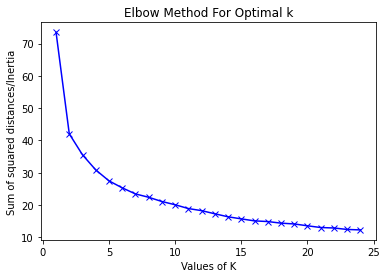

In [ ]:
#find the optimum K using Elbow method
Sum_of_squared_distances = []
K = range(1,25)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(d11)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# optomized number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(d11)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([2, 2, 6, 3, 3, 2, 2, 3, 3, 6, 3, 2, 2, 5, 5, 2, 5, 1, 2, 2, 2, 2,
       1, 5, 5, 2, 2, 1, 2, 6, 2, 5, 3, 5, 0, 3, 2, 2, 3, 3, 2, 5, 2, 5,
       0, 5, 0, 0, 2, 0, 0, 3, 5, 1, 1, 1, 0, 1, 1, 3, 3, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 5, 3, 3, 3, 2, 3, 0, 0, 5, 1, 6, 6, 6, 5, 1, 2, 5, 1,
       2, 2, 4, 4, 4, 2, 1, 2, 2, 6, 6, 1], dtype=int32)

In [ ]:
# add clustering labels
grouped_labeled=df10.copy()
grouped_labeled.insert(2, 'Cluster Labels', kmeans.labels_) #insert in the 2nd column
grouped_labeled

ZIP Code  Postal City  Cluster Labels   Latitude   Longitude  \
0       90007  Los Angeles               2  34.028334 -118.285077   
1       90011  Los Angeles               2  34.007904 -118.259037   
2       90012  Los Angeles               6  34.059483 -118.242048   
3       90013  Los Angeles               3  34.046022 -118.246250   
4       90014  Los Angeles               3  34.044754 -118.252737   
..        ...          ...             ...        ...         ...   
211     93543   Littlerock               1  34.533024 -117.958050   
212     93550     Palmdale               1  34.569083 -118.096117   
213     93551     Palmdale               5  34.605872 -118.183238   
214     93552     Palmdale               1  34.562822 -118.035439   
216     93560     Rosamond               5  34.860172 -118.211468   

     Price Index  Median Income  White Percent  Black Percent  Asian Percent  \
0       0.120133       0.124669       0.179088       0.143685       0.179310   
1       0.159166       0.168526       0.008899       0.144844       0.005172   
2       0.177637       0.142390       0.139043       0.188876       0.665517   
3       0.110672       0.062568       0.231368       0.442642       0.225862   
4       0.164071       0.060999       0.170189       0.286211       0.503448   
..           ...            ...            ...            ...            ...   
211     0.210074       0.309934       0.558398       0.113557       0.010345   
212     0.175115       0.264854       0.403782       0.161066       0.041379   
213     0.359326       0.480876       0.688543       0.093859       0.094828   
214     0.413601       0.354554       0.361513       0.193511       0.067241   
216     0.096147       0.296968       0.680756       0.061414       0.048276   

     Hispanic Percent  School rating  ATM  Accessories Store  Adult Boutique  \
0            0.593846       0.413131  0.0                0.0             0.0   
1            0.877949       0.263636  0.0                0.0             0.0   
2            0.309744       0.587879  0.0                0.0             0.0   
3            0.235897       0.587879  0.0                0.0             0.0   
4            0.278974       0.281818  0.0                0.0             0.0   
..                ...            ...  ...                ...             ...   
211          0.382564       0.305051  0.0                0.0             0.0   
212          0.445128       0.241414  0.0                0.0             0.0   
213          0.191795       0.410101  0.0                0.0             0.0   
214          0.442051       0.260606  0.0                0.0             0.0   
216          0.260513       0.272727  0.0                0.0             0.0   

     Advertising Agency  African Restaurant   Airport  Airport Service  \
0                   0.0                 0.0  0.000000              0.0   
1                   0.0                 0.0  0.000000              0.0   
2                   0.0                 0.0  0.000000              0.0   
3                   0.0                 0.0  0.000000              0.0   
4                   0.0                 0.0  0.000000              0.0   
..                  ...                 ...       ...              ...   
211                 0.0                 0.0  0.000000              0.0   
212                 0.0                 0.0  0.000000              0.0   
213                 0.0                 0.0  0.000000              0.0   
214                 0.0                 0.0  0.000000              0.0   
216                 0.0                 0.0  0.166667              0.0   

     Airport Terminal  American Restaurant  Amphitheater  Andhra Restaurant  \
0                 0.0             0.030000          0.01                0.0   
1                 0.0             0.000000          0.00                0.0   
2                 0.0             0.010000          0.00                0.0   
3                 0.0             0.020000       

#### Cluster 0

In [ ]:
pd.set_option('display.max_rows', None)  # no truncation of the rows

In [ ]:
grouped_labeled.loc[grouped_labeled['Cluster Labels'] == 0]

ZIP Code           Postal City  Cluster Labels   Latitude   Longitude  \
34      90049           Los Angeles               0  34.061721 -118.472259   
44      90067           Los Angeles               0  34.059553 -118.414588   
46      90069        West Hollywood               0  34.089403 -118.379789   
47      90077           Los Angeles               0  34.104093 -118.451017   
49      90210         Beverly Hills               0  34.085532 -118.404269   
50      90211         Beverly Hills               0  34.065662 -118.381466   
56      90245            El Segundo               0  33.920152 -118.405807   
63      90265                Malibu               0  34.035060 -118.760299   
64      90266       Manhattan Beach               0  33.890041 -118.403248   
66      90272     Pacific Palisades               0  34.048864 -118.535727   
67      90278         Redondo Beach               0  33.871414 -118.370730   
69      90290               Topanga               0  34.101282 -118.604947   
76      90402          Santa Monica               0  34.032544 -118.505846   
77      90403          Santa Monica               0  34.028421 -118.493537   
104     90720          Los Alamitos               0  33.798952 -118.068200   
108     90740            Seal Beach               0  33.761194 -118.088417   
118     91011  La Canada Flintridge               0  34.207791 -118.202930   
121     91024          Sierra Madre               0  34.164880 -118.052428   
138     91208              Glendale               0  34.190020 -118.227166   
139     91214          La Crescenta               0  34.228574 -118.246949   
143     91320          Newbury Park               0  34.181361 -118.935389   
146     91326          Porter Ranch               0  34.274930 -118.550139   
155     91354              Valencia               0  34.447492 -118.549209   
157     91362      Westlake Village               0  34.181860 -118.823879   
158     91364        Woodland Hills               0  34.162012 -118.598469   
159     91367        Woodland Hills               0  34.178584 -118.609579   
160     91381       Stevenson Ranch               0  34.389061 -118.582036   
168     91436                Encino               0  34.153844 -118.487337   
189     91741              Glendora               0  34.139053 -117.855030   
204     92886           Yorba Linda               0  33.890032 -117.806596   

     Price Index  Median Income  White Percent  Black Percent  Asian Percent  \
34      0.078145       0.595943       0.937709       0.013905       0.108621   
44      0.032680       0.528733       0.957731       0.023175       0.118966   
46      0.042341       0.361874       0.918799       0.028969       0.075862   
47      0.085388       1.000000       0.932147       0.013905       0.136207   
49      0.081955       0.795410       0.943270       0.013905       0.072414   
50      0.099050       0.408021       0.887653       0.012746       0.175862   
56      0.186150       0.433423       0.863181       0.012746       0.113793   
63      0.261900       0.712634       0.946607       0.019699       0.046552   
64      0.070243       0.711956       0.951057       0.004635       0.101724   
66      0.180760       0.868223       0.984427       0.003476       0.094828   
67      0.108215       0.491878       0.726363       0.028969       0.182759   
69      0.060608       0.626460       1.000000       0.004635       0.037931   
76      0.126774       0.837671       0.982202       0.002317       0.089655   
77      0.133875       0.388364       0.908788       0.012746       0.122414   
104     0.275196       0.464328       0.842047       0.019699       0.122414   
108     0.310807       0.297237       0.919911       0.024334       0.089655   
118     0.178008       0.775838       0.791991       0.005794       0.329310   
121     0.150602       0.465367       0.882091       0.012746       0.091379   
138     0.385225       0.537240       0.746385       0.001159     

#### Cluster 1

In [ ]:
grouped_labeled.loc[grouped_labeled['Cluster Labels'] == 1]

ZIP Code      Postal City  Cluster Labels   Latitude   Longitude  \
17      90028      Los Angeles               1  34.100722 -118.328218   
22      90034      Los Angeles               1  34.028291 -118.402696   
27      90039      Los Angeles               1  34.111602 -118.261257   
53      90240           Downey               1  33.956203 -118.119827   
54      90241           Downey               1  33.940491 -118.131667   
55      90242           Downey               1  33.922033 -118.140079   
57      90247          Gardena               1  33.891892 -118.298498   
58      90248          Gardena               1  33.875442 -118.282378   
79      90501         Torrance               1  33.829094 -118.314210   
84      90601         Whittier               1  33.995473 -118.040466   
87      90604         Whittier               1  33.929733 -118.013618   
94      90650          Norwalk               1  33.906213 -118.081948   
99      90710      Harbor City               1  33.794803 -118.298729   
102     90715         Lakewood               1  33.839661 -118.079549   
106     90731        San Pedro               1  33.732722 -118.292298   
111     90804       Long Beach               1  33.781733 -118.152358   
113     90806       Long Beach               1  33.801481 -118.189200   
117     91010           Duarte               1  34.137724 -117.966557   
124     91101         Pasadena               1  34.145210 -118.138307   
126     91104         Pasadena               1  34.167000 -118.127588   
134     91204         Glendale               1  34.136694 -118.259498   
140     91304      Canoga Park               1  34.221921 -118.609679   
148     91335           Reseda               1  34.200183 -118.540320   
151     91343      North Hills               1  34.235513 -118.475266   
152     91345     San Fernando               1  34.262121 -118.461758   
161     91401         Van Nuys               1  34.181152 -118.434827   
164     91405         Van Nuys               1  34.200470 -118.448696   
165     91406         Van Nuys               1  34.199814 -118.486889   
166     91411         Van Nuys               1  34.179332 -118.457930   
170     91502          Burbank               1  34.176442 -118.306476   
175     91606  North Hollywood               1  34.186731 -118.386806   
180     91710            Chino               1  34.017832 -117.689437   
182     91722           Covina               1  34.095803 -117.905810   
183     91723           Covina               1  34.084962 -117.886427   
193     92301         Adelanto               1  34.557682 -117.438257   
198     92801          Anaheim               1  33.842194 -117.952658   
201     92832        Fullerton               1  33.867143 -117.928599   
208     93534        Lancaster               1  34.687584 -118.149678   
209     93535        Lancaster               1  34.688762 -118.059288   
211     93543       Littlerock               1  34.533024 -117.958050   
212     93550         Palmdale               1  34.569083 -118.096117   
214     93552         Palmdale               1  34.562822 -118.035439   

     Price Index  Median Income  White Percent  Black Percent  Asian Percent  \
17      0.158555       0.154691       0.459399       0.079954       0.132759   
22      0.156633       0.263066       0.389321       0.168019       0.281034   
27      0.071545       0.322306       0.330367       0.026651       0.312069   
53      0.132192       0.392095       0.368187       0.016222       0.158621   
54      0.092100       0.307765       0.341491       0.028969       0.115517   
55      0.069919       0.303518       0.263626       0.062572       0.110345   
57      0.065788       0.248016       0.103448       0.214368       0.465517   
58      0.227513       0.304712       0.147942       0.199305       0.484483   
79      0.077936       0.297590       0.368187       0.068366       0.317241   
84      0.104822       0.373074       0.321468       0.005794    

#### Cluster 2

In [ ]:
grouped_labeled.loc[grouped_labeled['Cluster Labels'] == 2]

ZIP Code       Postal City  Cluster Labels   Latitude   Longitude  \
0       90007       Los Angeles               2  34.028334 -118.285077   
1       90011       Los Angeles               2  34.007904 -118.259037   
5       90015       Los Angeles               2  34.040122 -118.264990   
6       90017       Los Angeles               2  34.052301 -118.263386   
11      90022       Los Angeles               2  34.023581 -118.155117   
12      90023       Los Angeles               2  34.024180 -118.201957   
15      90026       Los Angeles               2  34.076872 -118.265359   
18      90029       Los Angeles               2  34.089894 -118.294909   
19      90031       Los Angeles               2  34.077524 -118.213106   
20      90032       Los Angeles               2  34.081512 -118.176786   
21      90033       Los Angeles               2  34.048564 -118.211520   
25      90037       Los Angeles               2  34.003494 -118.287097   
26      90038       Los Angeles               2  34.088982 -118.324838   
28      90040       Los Angeles               2  33.996494 -118.151489   
30      90042       Los Angeles               2  34.113322 -118.191429   
36      90057       Los Angeles               2  34.062112 -118.277138   
37      90058       Los Angeles               2  34.001842 -118.221127   
40      90063       Los Angeles               2  34.044884 -118.185937   
42      90065       Los Angeles               2  34.108812 -118.227666   
48      90201      Bell Gardens               2  33.969581 -118.175048   
61      90255   Huntington Park               2  33.978671 -118.218998   
62      90262           Lynwood               2  33.925123 -118.203199   
65      90270           Maywood               2  33.988503 -118.188948   
68      90280        South Gate               2  33.944962 -118.197490   
74      90304         Inglewood               2  33.939383 -118.358129   
85      90602          Whittier               2  33.971141 -118.035056   
88      90605          Whittier               2  33.945883 -118.032567   
89      90606          Whittier               2  33.976394 -118.066027   
93      90640        Montebello               2  34.014030 -118.113188   
95      90660       Pico Rivera               2  33.991332 -118.091237   
96      90670  Santa Fe Springs               2  33.935920 -118.066088   
103     90716  Hawaiian Gardens               2  33.831371 -118.071446   
105     90723         Paramount               2  33.895372 -118.165359   
147     91331           Pacoima               2  34.257264 -118.419820   
149     91340      San Fernando               2  34.286193 -118.437447   
150     91342            Sylmar               2  34.305141 -118.435218   
154     91352        Sun Valley               2  34.225510 -118.376517   
162     91402     Panorama City               2  34.225754 -118.448927   
174     91605   North Hollywood               2  34.205462 -118.401940   
177     91702             Azusa               2  34.127122 -117.906209   
178     91706      Baldwin Park               2  34.085123 -117.967987   
185     91731          El Monte               2  34.078814 -118.039128   
186     91732          El Monte               2  34.070680 -118.016060   
187     91733    South El Monte               2  34.055104 -118.046996   
190     91744         La Puente               2  34.030754 -117.939666   

     Price Index  Median Income  White Percent  Black Percent  Asian Percent  \
0       0.120133       0.124669       0.179088       0.143685       0.179310   
1       0.159166       0.168526       0.008899       0.144844       0.005172   
5       0.059774       0.130950       0.061179       0.048667       0.160345   
6       0.049046       0.104906       0.037820       0.037080       0.096552   
11      0.097073       0.194104       0.022247       0.003476       0.008621   
12      0.135005       0.189957       0.014461       0.002317       0.010345   
15      0.105053       0.202442       0.

#### Cluster 3

In [ ]:
grouped_labeled.loc[grouped_labeled['Cluster Labels'] == 3]

ZIP Code  Postal City  Cluster Labels   Latitude   Longitude  \
3       90013  Los Angeles               3  34.046022 -118.246250   
4       90014  Los Angeles               3  34.044754 -118.252737   
7       90018  Los Angeles               3  34.030772 -118.316869   
8       90019  Los Angeles               3  34.048842 -118.336109   
10      90021  Los Angeles               3  34.030124 -118.241779   
32      90047  Los Angeles               3  33.956872 -118.309078   
35      90056  Los Angeles               3  33.986513 -118.369600   
38      90059  Los Angeles               3  33.927013 -118.248396   
39      90062  Los Angeles               3  34.003872 -118.308857   
51      90222      Compton               3  33.912031 -118.235026   
59      90249      Gardena               3  33.900504 -118.319137   
60      90250    Hawthorne               3  33.914152 -118.347158   
71      90301    Inglewood               3  33.956363 -118.354849   
72      90302    Inglewood               3  33.973752 -118.357686   
73      90303    Inglewood               3  33.937784 -118.331260   
75      90305    Inglewood               3  33.958093 -118.329209   
110     90746       Carson               3  33.858883 -118.261010   
112     90805   Long Beach               3  33.862811 -118.179106   
114     91001     Altadena               3  34.190364 -118.138967   
125     91103     Pasadena               3  34.163724 -118.155196   

     Price Index  Median Income  White Percent  Black Percent  Asian Percent  \
3       0.110672       0.062568       0.231368       0.442642       0.225862   
4       0.164071       0.060999       0.170189       0.286211       0.503448   
7       0.054563       0.168145       0.028921       0.494786       0.043103   
8       0.128231       0.222579       0.096774       0.367323       0.218966   
10      0.085299       0.092230       0.172414       0.373117       0.046552   
32      0.099707       0.248306       0.012236       0.852839       0.013793   
35      0.030440       0.510101       0.181313       0.849363       0.055172   
38      0.094052       0.156514       0.007786       0.515643       0.003448   
39      0.035967       0.190077       0.022247       0.571263       0.018966   
51      0.167785       0.208582       0.005562       0.429896       0.001724   
59      0.276328       0.314081       0.187987       0.366165       0.274138   
60      0.108325       0.237806       0.170189       0.342990       0.125862   
71      0.144192       0.221202       0.050056       0.403244       0.024138   
72      0.235977       0.231037       0.061179       0.617613       0.015517   
73      0.075547       0.245543       0.022247       0.446118       0.003448   
75      0.133188       0.322984       0.031146       1.000000       0.005172   
110     0.195302       0.419637       0.083426       0.784473       0.087931   
112     0.237657       0.230097       0.165740       0.272306       0.179310   
114     0.105437       0.448981       0.377086       0.418308       0.056897   
125     0.149531       0.246059       0.181313       0.317497       0.089655   

     Hispanic Percent  School rating  ATM  Accessories Store  Adult Boutique  \
3            0.235897       0.587879  0.0                0.0             0.0   
4            0.278974       0.281818  0.0                0.0             0.0   
7            0.508718       0.300000  0.0                0.0             0.0   
8            0.451282       0.348485  0.0                0.0             0.0   
10           0.462564       0.237374  0.0                0.0             0.0   
32           0.233846       0.105051  0.0                0.0             0.0   
35           0.037949       0.332323  0.0                0.0             0.0   
38           0.549744       0.320202  0.0                0.0             0.0   
39           0.455385       0.126263  0.0                0.0             0.0   
51           0.624615       0.281818  0.0                0.0             0

#### Cluster 4

In [ ]:
cluster5=grouped_labeled.loc[grouped_labeled['Cluster Labels'] == 4]
cluster5

ZIP Code       Postal City  Cluster Labels   Latitude   Longitude  \
90      90621        Buena Park               4  33.870371 -117.996990   
91      90630           Cypress               4  33.820143 -118.039810   
92      90638         La Mirada               4  33.902672 -118.007087   
131     91201          Glendale               4  34.169173 -118.291816   
132     91202          Glendale               4  34.163611 -118.264959   
195     92647  Huntington Beach               4  33.720373 -118.000870   
196     92648  Huntington Beach               4  33.675663 -117.999727   
197     92649  Huntington Beach               4  33.720981 -118.043729   

     Price Index  Median Income  White Percent  Black Percent  Asian Percent  \
90      0.963008       0.294756       0.302558       0.046350       0.370690   
91      0.513344       0.449462       0.637375       0.031286       0.350000   
92      0.565472       0.436129       0.519466       0.020857       0.256897   
131     0.770345       0.269765       0.607341       0.011587       0.189655   
132     0.461095       0.352004       0.681869       0.017381       0.293103   
195     0.712271       0.406481       0.662959       0.008111       0.198276   
196     0.858808       0.453313       0.840934       0.004635       0.139655   
197     1.000000       0.500110       0.885428       0.005794       0.106897   

     Hispanic Percent  School rating       ATM  Accessories Store  \
90           0.448205       0.515152  0.010309                0.0   
91           0.160000       0.862626  0.000000                0.0   
92           0.342564       0.738384  0.000000                0.0   
131          0.228718       0.756566  0.000000                0.0   
132          0.114872       0.727273  0.027027                0.0   
195          0.248205       0.588889  0.010000                0.0   
196          0.127179       0.875758  0.010000                0.0   
197          0.102564       0.826263  0.000000                0.0   

     Adult Boutique  Advertising Agency  African Restaurant  Airport  \
90              0.0                 0.0                 0.0      0.0   
91              0.0                 0.0                 0.0      0.0   
92              0.0                 0.0                 0.0      0.0   
131             0.0                 0.0                 0.0      0.0   
132             0.0                 0.0                 0.0      0.0   
195             0.0                 0.0                 0.0      0.0   
196             0.0                 0.0                 0.0      0.0   
197             0.0                 0.0                 0.0      0.0   

     Airport Service  Airport Terminal  American Restaurant  Amphitheater  \
90               0.0               0.0             0.000000           0.0   
91               0.0               0.0             0.028571           0.0   
92               0.0               0.0             0.027027           0.0   
131              0.0               0.0             0.000000           0.0   
132              0.0               0.0             0.054054           0.0   
195              0.0               0.0             0.070000           0.0   
196              0.0               0.0             0.010000           0.0   
197              0.0               0.0             0.029851           0.0   

     Andhra Restaurant  Animal Shelter  Antique Shop  Aquarium    Arcade  \
90                 0.0             0.0           0.0       0.0  0.000000   
91                 0.0             0.0           0.0       0.0  0.000000   
92                 0.0             0.0           0.0       0.0  0.000000   
131                0.0             0.0           0.0       0.0  0.011494   
132                0.0             0.0           0.0       0.0  0.000000   
195                0.0             0.0           0.0       0.0  0.000000   
196                0.0             0.0           0.0       0.0  0.000000   
197                0.0             0.0      

In [ ]:
cluster5.shape

(8, 471)

#### Cluster 5

In [ ]:
grouped_labeled.loc[grouped_labeled['Cluster Labels'] == 5]

ZIP Code     Postal City  Cluster Labels   Latitude   Longitude  \
13      90024     Los Angeles               5  34.061360 -118.440237   
14      90025     Los Angeles               5  34.045184 -118.450256   
16      90027     Los Angeles               5  34.105462 -118.292368   
23      90035     Los Angeles               5  34.054282 -118.383856   
24      90036     Los Angeles               5  34.068921 -118.350808   
31      90045     Los Angeles               5  33.961521 -118.393450   
33      90048     Los Angeles               5  34.073161 -118.374067   
41      90064     Los Angeles               5  34.035412 -118.432177   
43      90066     Los Angeles               5  34.002151 -118.429040   
45      90068     Los Angeles               5  34.115251 -118.331416   
52      90230     Culver City               5  33.995064 -118.395010   
70      90291          Venice               5  33.992583 -118.466376   
78      90405    Santa Monica               5  34.010133 -118.472677   
83      90505        Torrance               5  33.811453 -118.347879   
86      90603        Whittier               5  33.943702 -117.991980   
100     90712        Lakewood               5  33.849072 -118.146180   
101     90713        Lakewood               5  33.848711 -118.113579   
107     90732       San Pedro               5  33.739461 -118.313406   
119     91016        Monrovia               5  34.143633 -118.003898   
120     91020        Montrose               5  34.209964 -118.230877   
122     91040         Sunland               5  34.259701 -118.324499   
123     91042         Tujunga               5  34.254600 -118.287258   
127     91105        Pasadena               5  34.136981 -118.159176   
128     91106        Pasadena               5  34.142864 -118.128500   
129     91107        Pasadena               5  34.150763 -118.092289   
133     91203        Glendale               5  34.152823 -118.261327   
135     91205        Glendale               5  34.138532 -118.243869   
136     91206        Glendale               5  34.153792 -118.237208   
137     91207        Glendale               5  34.163811 -118.247888   
141     91311      Chatsworth               5  34.252823 -118.595028   
142     91316          Encino               5  34.166731 -118.516296   
144     91321         Newhall               5  34.385524 -118.514019   
145     91325      Northridge               5  34.235882 -118.521058   
153     91351  Canyon Country               5  34.422982 -118.471438   
156     91356         Tarzana               5  34.169903 -118.540489   
163     91403    Sherman Oaks               5  34.154504 -118.459559   
167     91423    Sherman Oaks               5  34.153062 -118.432959   
169     91501         Burbank               5  34.185184 -118.302370   
171     91504         Burbank               5  34.198254 -118.330499   
172     91505         Burbank               5  34.167674 -118.344499   
173     91506         Burbank               5  34.171111 -118.322578   
176     91607  Valley Village               5  34.166153 -118.399337   
181     91711       Claremont               5  34.108213 -117.719096   
184     91724          Covina               5  34.091232 -117.858336   
188     91740        Glendora               5  34.117094 -117.854999   
199     92821            Brea               5  33.922842 -117.895086   
200     92831       Fullerton               5  33.881390 -117.891749   
203     92835       Fullerton               5  33.901021 -117.913618   
205     93510           Acton               5  34.489013 -118.197038   
207     93532     Lake Hughes               5  34.679133 -118.447719   
210     93536       Lancaster               5  34.688162 -118.234179   
213     93551        Palmdale               5  34.605872 -118.183238   
216     93560        Rosamond               5  34.860172 -118.211468   

     Price Index  Median Income  White Percent  Black Percent  Asian Percent  \
13      0.063501       0.336141     

#### Cluster 6

In [ ]:
grouped_labeled.loc[grouped_labeled['Cluster Labels'] == 6]

ZIP Code       Postal City  Cluster Labels   Latitude   Longitude  \
2       90012       Los Angeles               6  34.059483 -118.242048   
9       90020       Los Angeles               6  34.066361 -118.301648   
29      90041       Los Angeles               6  34.135382 -118.206849   
80      90502          Torrance               6  33.831631 -118.292819   
81      90503          Torrance               6  33.839952 -118.353906   
82      90504          Torrance               6  33.871653 -118.331260   
97      90701           Artesia               6  33.866313 -118.081048   
98      90703          Cerritos               6  33.866930 -118.069047   
109     90745            Carson               6  33.825974 -118.269669   
115     91006           Arcadia               6  34.132223 -118.024989   
116     91007           Arcadia               6  34.127782 -118.053136   
130     91108        San Marino               6  34.120983 -118.113136   
179     91709       Chino Hills               6  33.975851 -117.725357   
191     91745  Hacienda Heights               6  33.997784 -117.966049   
192     91748   Rowland Heights               6  33.985184 -117.901247   
202     92833         Fullerton               6  33.870154 -117.963007   

     Price Index  Median Income  White Percent  Black Percent  Asian Percent  \
2       0.177637       0.142390       0.139043       0.188876       0.665517   
9       0.081444       0.171049       0.107898       0.078795       0.731034   
29      0.082418       0.342260       0.333704       0.020857       0.420690   
80      0.109583       0.343404       0.299221       0.089224       0.434483   
81      0.137740       0.410713       0.572859       0.020857       0.558621   
82      0.145287       0.357437       0.428254       0.032445       0.612069   
97      0.301915       0.314428       0.289210       0.034762       0.474138   
98      0.186438       0.515138       0.231368       0.074160       1.000000   
109     0.183730       0.357600       0.151279       0.085747       0.555172   
115     0.153044       0.415320       0.464961       0.004635       0.718966   
116     0.162673       0.362157       0.460512       0.010429       0.746552   
130     0.300942       0.841868       0.493882       0.005794       0.786207   
179     0.188147       0.553506       0.486096       0.062572       0.362069   
191     0.430593       0.421418       0.248053       0.013905       0.622414   
192     0.215470       0.364877       0.164627       0.024334       0.889655   
202     0.089594       0.359854       0.457175       0.018540       0.434483   

     Hispanic Percent  School rating       ATM  Accessories Store  \
2            0.309744       0.587879  0.000000               0.00   
9            0.394872       0.538384  0.000000               0.00   
29           0.401026       0.710101  0.000000               0.00   
80           0.340513       0.527273  0.000000               0.00   
81           0.101538       0.875758  0.000000               0.01   
82           0.177436       0.759596  0.000000               0.00   
97           0.391795       0.835354  0.000000               0.00   
98           0.109744       0.851515  0.000000               0.00   
109          0.413333       0.502020  0.000000               0.00   
115          0.136410       0.946465  0.000000               0.00   
116          0.102564       0.923232  0.013699               0.00   
130          0.054359       0.885859  0.000000               0.00   
179          0.262564       0.829293  0.000000               0.00   
191          0.387692       0.706061  0.021739               0.00   
192          0.284103       0.719192  0.000000               0.00   
202          0.297436       0.563636  0.012987               0.00   

     Adult Boutique  Advertising Agency  African Restaurant   Airport  \
2               0.0                 0.0                 0.0  0.000000   
9               0.0                 0.0                 0.0  0.00

#### visualize the resulting clusters.

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude_1, longitude_1], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for index, location_info in grouped_labeled[["Latitude", "Longitude", "ZIP Code","Postal City","Cluster Labels"]].iterrows():
    zip_code=location_info["ZIP Code"]
    lat=location_info["Latitude"]
    lon=location_info["Longitude"]
    poi=location_info["Postal City"]
    cluster=location_info["Cluster Labels"]
    label = folium.Popup(str(zip_code) + str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat,lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



## E. Conclusion.

From cluster4, three zipcodes, 90630	Cypress, 90638	La Mirada,  91202	Glendale, although midium priced, clustered together with high priced zipcodes, their prices have the potential to go up.